In [ ]:
import pandas as pd

abonnes = pd.read_csv(r"/content/churn-bigml-80.csv")
abonnes_test = pd.read_csv(r"/content/churn-bigml-20.csv")
abonnes.head().transpose()


,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [ ]:
abonnes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
abonnes_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    int64  
 4   Voice mail plan         667 non-null    int64  
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
print("Valeurs uniques:\n", abonnes.nunique())


Valeurs uniques:
 State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64


In [ ]:
print("Valeurs uniques:\n", abonnes_test.nunique())


Valeurs uniques:
 State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge         132
Customer service calls      9
Churn                       2
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# La variable col_bin contient les noms des 3 attributs
col_bin = abonnes.nunique()[abonnes.nunique() == 2].keys().tolist()

# Modifier les 3 attributs
encodeur = LabelEncoder()
for i in col_bin:
  abonnes[i] = encodeur.fit_transform(abonnes[i])
  abonnes_test[i] = encodeur.fit_transform(abonnes_test[i])

# Tableau de sommaire des 19 colonnes numériques (de type int ou float)
sommaire = (abonnes_test[[i for i in abonnes_test.columns]].describe().transpose().reset_index())
sommaire


,index,count,mean,std,min,25%,50%,75%,max
0,Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
1,Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
2,International plan,667.0,0.079460,0.270659,0.00,0.00,0.00,0.000,1.00
3,Voice mail plan,667.0,0.283358,0.450967,0.00,0.00,0.00,1.000,1.00
4,Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
5,Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
6,Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
7,Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
8,Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
9,Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00


In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np

# Visualization
correlation = abonnes.corr()
col_mat = correlation.columns.tolist() # tick labels
corr_array = np.array(correlation) # convert to array
trace = go.Heatmap(z = corr_array,
                   x = col_mat,
                   y = col_mat,
                   colorscale = "rainbow",
                   colorbar = dict(title = "Coefficients de corrélation de Pearson", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Matrice de corrélation",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


<ipython-input-9-78dcba38b312>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Pearson correlation between the feature 'Churn' and other features
abonnes.corrwith(abonnes.iloc[:,19])


<ipython-input-10-14e420846921>:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Account length            0.017728
Area code                 0.001019
International plan        0.277489
Voice mail plan          -0.099291
Number vmail messages    -0.086474
Total day minutes         0.195688
Total day calls           0.018290
Total day charge          0.195689
Total eve minutes         0.072906
Total eve calls          -0.001539
Total eve charge          0.072893
Total night minutes       0.033639
Total night calls         0.012262
Total night charge        0.033635
Total intl minutes        0.086204
Total intl calls         -0.069882
Total intl charge         0.086216
Customer service calls    0.202590
Churn                     1.000000
dtype: float64

In [ ]:
# Rank correlation (spearman)
abonnes.corrwith(abonnes.iloc[:,19], method='spearman')


<ipython-input-11-ab77817426e2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Account length            0.016933
Area code                 0.005290
International plan        0.277489
Voice mail plan          -0.099291
Number vmail messages    -0.092049
Total day minutes         0.163019
Total day calls           0.028694
Total day charge          0.163019
Total eve minutes         0.070615
Total eve calls           0.000572
Total eve charge          0.070610
Total night minutes       0.032434
Total night calls         0.010341
Total night charge        0.032432
Total intl minutes        0.080261
Total intl calls         -0.089859
Total intl charge         0.080261
Customer service calls    0.125550
Churn                     1.000000
dtype: float64

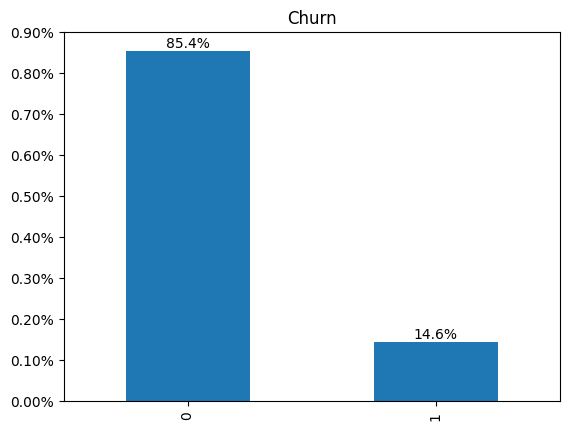

In [ ]:
import matplotlib.ticker as mtick

nbr_churn = abonnes['Churn'].value_counts()

nbr_churn[0] = nbr_churn[0]/abonnes.Churn.count()
nbr_churn[1] = nbr_churn[1]/abonnes.Churn.count()

ax = nbr_churn.plot.bar(x=nbr_churn, )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Churn')
ax.set_ylim((0,0.9))
for c in ax.containers:
  ratios = c.datavalues / c.datavalues.sum()
  ax.bar_label(c, labels=[f'{r:.1%}' for r in ratios])


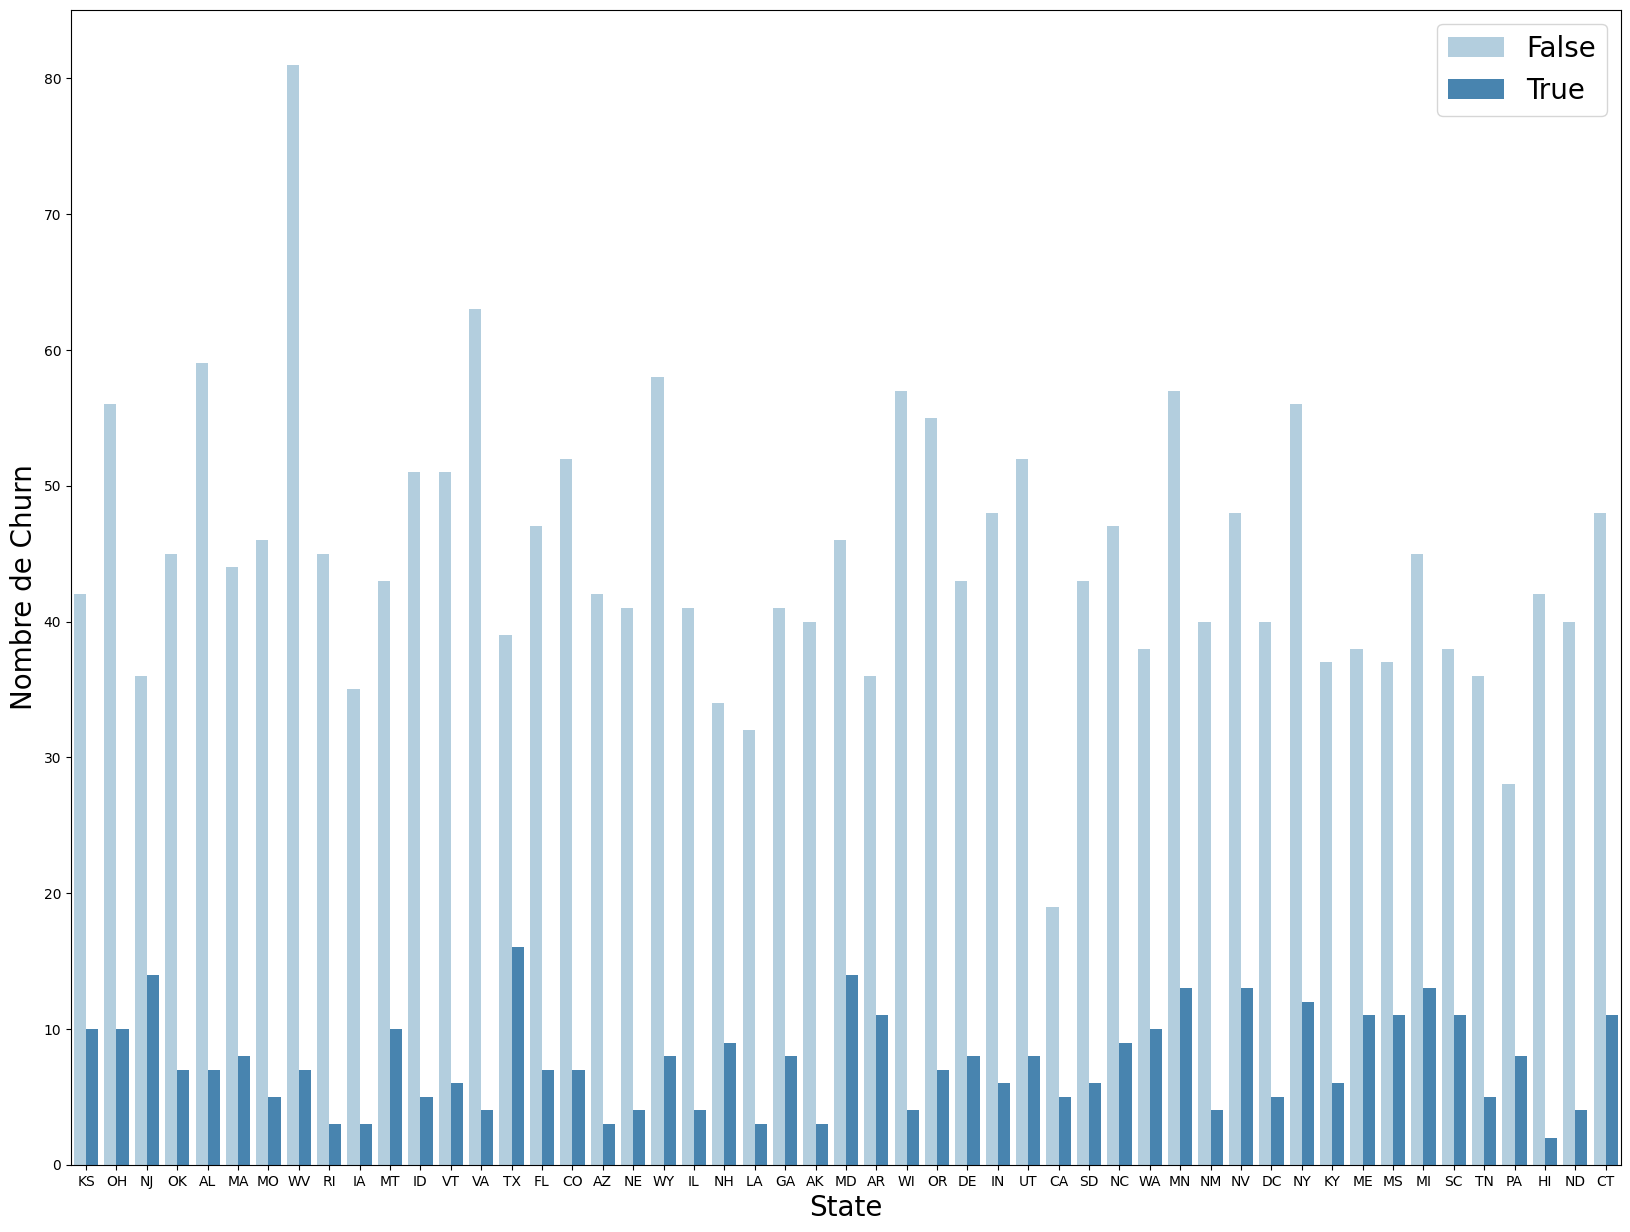

In [ ]:
# Churn vs State
import matplotlib.pyplot as plt
import seaborn as sns #visualization

fig, axz = plt.subplots(figsize=(20,15))
axz = sns.countplot(x='State', hue='Churn', data=abonnes, palette='Blues')
axz.set_ylabel('Nombre de Churn', size=20)
axz.set_xlabel('State', size=20)
axz.legend(loc=0, fontsize=20, labels=['False','True']);


In [ ]:
# Filtrer les abonnes ayant Churn = 1 (True)
abonnes_churn = abonnes[abonnes.Churn == 1]
# Nombre d'abonnes_churn par State
abonnes_churn.State.value_counts()


TX    16
MD    14
NJ    14
MN    13
NV    13
MI    13
NY    12
AR    11
CT    11
MS    11
ME    11
SC    11
MT    10
KS    10
OH    10
WA    10
NC     9
NH     9
PA     8
UT     8
DE     8
GA     8
MA     8
WY     8
OK     7
WV     7
CO     7
AL     7
OR     7
FL     7
SD     6
KY     6
VT     6
IN     6
MO     5
CA     5
ID     5
DC     5
TN     5
IL     4
ND     4
WI     4
NM     4
NE     4
VA     4
LA     3
IA     3
AZ     3
RI     3
AK     3
HI     2
Name: State, dtype: int64

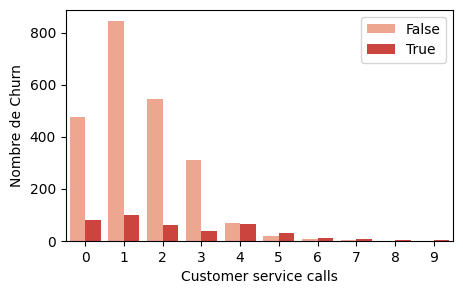

In [ ]:
# Churn vs Customer service calls
fig, axz = plt.subplots(figsize=(5,3))
axz = sns.countplot(x='Customer service calls', hue='Churn', data=abonnes, palette='Reds')

axz.set_ylabel('Nombre de Churn', size=10)
axz.set_xlabel('Customer service calls', size=10)
axz.legend(loc=0, fontsize=10, labels=['False', 'True']);


In [ ]:
# Visualization: draw 18 figures
for feature in range(1,19):
#feature=19
  slope, intercept, r, p, stderr = scipy.stats.linregress(abonnes.iloc[:,19], abonnes.iloc[:,feature])
  line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#  line
  fig, ax = plt.subplots()
  ax.plot(abonnes.iloc[:,19], abonnes.iloc[:,feature], linewidth=0, marker='s', label='Data points')
  ax.plot(abonnes.iloc[:,19], intercept + slope * abonnes.iloc[:,19], label=line)
  ax.set_xlabel('Churn')
  ax.set_ylabel(abonnes.columns[feature])
  ax.legend(facecolor='white')
  #print(abonnes.columns[8])
  plt.show()
# The blue squares represent the observations, while the orange line is the regression line. Its equation is listed in the legend, together with the correlation coefficient.


# Heatmaps of correlation matrices
#corr_matrix = np.corrcoef(abonnes.iloc[:,1:18]).round(decimals=2)
#corr_matrix


In [ ]:
# Function to call all Classification Algorithms
def classement(data, data_test):
    #importing Classification libraries
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier, plot_importance

    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    data = data[data["Churn"].notnull()]
    x, y = data.drop("Churn", axis = 1), data[["Churn"]]
    x = x.drop('State', axis = 1)

    data_test = data_test[data_test["Churn"].notnull()]
    x_test, y_test = data_test.drop("Churn", axis = 1), data_test[["Churn"]]
    x_test = x_test.drop('State', axis = 1)

    KN = KNeighborsClassifier()
    D = DecisionTreeClassifier()
    R = RandomForestClassifier()
    XGB = XGBClassifier()

    algorithmes = [KN, D, R, XGB]
    noms_algo = ['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']

    score_accuracy = []
    score_precision = []
    score_recall = []
    score_f1 = []

    for item in algorithmes:
        item.fit(x, y)
        prediction = item.predict(x_test)
        score_accuracy.append(accuracy_score(y_test, prediction))
        score_precision.append(precision_score(y_test, prediction))
        score_recall.append(recall_score(y_test, prediction))
        score_f1.append(f1_score(y_test, prediction))

    plot_importance(XGB)
    plt.title('Importance d’attribut selon XGB')
    plt.grid(False)
    plt.show()

    # create confusion matrix for XGB classifier
    fig = plt.figure(figsize=(5, 5))
    fig.set_facecolor("#F3F3F3")
    mat = confusion_matrix(y_test, XGB.predict(x_test))
    sns.heatmap(mat, annot=True, fmt = "d", square = True,
                xticklabels=["Non churn", "Churn"],
                yticklabels=["Non churn", "Churn"],
                linewidths = 2, linecolor = "w", cmap = "Set1")
    plt.title('Matrice de confusion XGB', color = "b")
    plt.subplots_adjust(wspace = .3, hspace = .3)

    # create dataframe with results
    result = pd.DataFrame(columns = ['score_accuracy','score_f1', 'score_recall','score_precision'],index = noms_algo)
    result['score_accuracy'] = score_accuracy
    result['score_f1'] = score_f1
    result['score_recall'] = score_recall
    result['score_precision'] = score_precision
    return result.sort_values('score_accuracy', ascending = False)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-16-0b7e3f342f27>:36: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



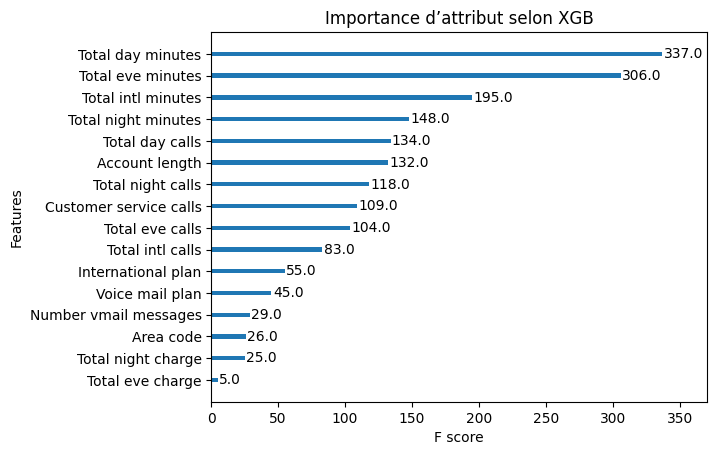

,score_accuracy,score_f1,score_recall,score_precision
XGBClassifier,0.956522,0.836158,0.778947,0.902439
RandomForestClassifier,0.955022,0.817073,0.705263,0.971014
DecisionTreeClassifier,0.919040,0.721649,0.736842,0.707071
KNeighborsClassifier,0.886057,0.449275,0.326316,0.720930


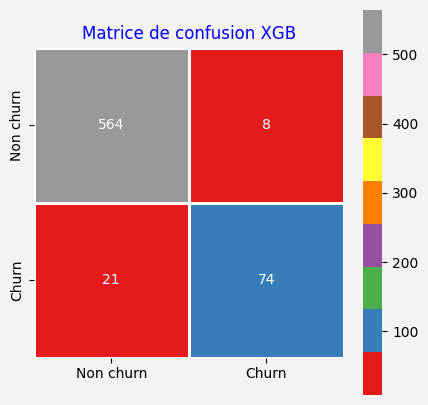

In [ ]:
# run the model training
classement(abonnes, abonnes_test)


The best result is scored by the XGBClassifier and RandomForestClassifier with accuracy of 96%.

- optimizing and/or Implmenting a better network infrastructure, especially in the states with the highest Churn cases: Texas, Maryland, New Jersey, Minnesota, Nevada and Michigan.
- There are subscribers that churn after making one call to the customer service. It's recommended to improve the customer service to increase the First Call Resolution (FCR) metric.
- According to the Feature importance plot, the most important features that impact Churn (excluding the minutes and calls features) are:
 + Account length:
 + International plan:
- to predict churn rate correctly, XGBoost Classifier Performs best and would be a recommended Model.
